In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
block_size = 3
X, Y = [], []
for w in words[:5]:
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [7]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([32, 3]), torch.Size([32]), torch.int64, torch.int64)

In [8]:
C = torch.randn((27,2))

In [9]:
C

tensor([[ 0.9012,  0.3721],
        [ 0.1162,  1.1783],
        [ 0.3906,  1.3348],
        [ 0.1141, -1.9876],
        [-0.2224,  1.0276],
        [ 0.9287,  0.9907],
        [-0.7289, -1.2672],
        [ 0.7796,  1.2001],
        [ 0.4034,  0.2232],
        [-1.5284,  0.0710],
        [ 1.6051,  0.2116],
        [ 0.1095, -0.3994],
        [ 0.5340,  1.8877],
        [ 0.5813, -1.2024],
        [-0.6856, -0.3171],
        [ 1.1206,  0.2369],
        [-0.0453, -0.2977],
        [ 0.3641,  0.4012],
        [-0.2257,  1.0563],
        [-0.9216, -0.8924],
        [ 1.9869, -0.6988],
        [ 0.8795,  0.3780],
        [-0.0702,  1.4411],
        [ 1.8555,  0.6027],
        [ 1.2483, -0.7356],
        [-0.0944,  0.1343],
        [ 0.3900,  0.6563]])

In [10]:
# Create embedding matrix
emb = C[X]
emb.shape, emb

(torch.Size([32, 3, 2]),
 tensor([[[ 0.9012,  0.3721],
          [ 0.9012,  0.3721],
          [ 0.9012,  0.3721]],
 
         [[ 0.9012,  0.3721],
          [ 0.9012,  0.3721],
          [ 0.9287,  0.9907]],
 
         [[ 0.9012,  0.3721],
          [ 0.9287,  0.9907],
          [ 0.5813, -1.2024]],
 
         [[ 0.9287,  0.9907],
          [ 0.5813, -1.2024],
          [ 0.5813, -1.2024]],
 
         [[ 0.5813, -1.2024],
          [ 0.5813, -1.2024],
          [ 0.1162,  1.1783]],
 
         [[ 0.9012,  0.3721],
          [ 0.9012,  0.3721],
          [ 0.9012,  0.3721]],
 
         [[ 0.9012,  0.3721],
          [ 0.9012,  0.3721],
          [ 1.1206,  0.2369]],
 
         [[ 0.9012,  0.3721],
          [ 1.1206,  0.2369],
          [ 0.5340,  1.8877]],
 
         [[ 1.1206,  0.2369],
          [ 0.5340,  1.8877],
          [-1.5284,  0.0710]],
 
         [[ 0.5340,  1.8877],
          [-1.5284,  0.0710],
          [-0.0702,  1.4411]],
 
         [[-1.5284,  0.0710],
          [-0.0

In [11]:
X[13], C[X][13]

(tensor([0, 0, 1]),
 tensor([[0.9012, 0.3721],
         [0.9012, 0.3721],
         [0.1162, 1.1783]]))

In [12]:
#Randomly initialized weights and biases
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W1, b1

(tensor([[ 0.7467,  0.0260, -0.2044,  1.5721,  1.1299,  0.3745, -0.1066,  1.1448,
           1.1770,  0.5470,  1.0084, -1.2837, -0.5983,  0.2801,  0.5594,  0.7199,
           1.2268,  1.0178,  0.7685,  0.5861, -0.9447,  0.5268,  0.5371,  0.1618,
          -0.1584, -1.2729, -0.0299, -2.4172, -0.2590,  0.2062, -0.1588, -0.2077,
          -1.7258,  2.4284, -1.1010, -0.8307,  0.6217,  0.3064,  1.2433, -0.1799,
          -1.1644,  0.1991, -0.6455,  0.2861,  1.0028,  0.5277, -1.3611,  0.4308,
           1.0616,  0.6357, -0.8659, -0.6146,  1.8479, -0.5030, -0.3939, -0.6220,
           0.4496, -0.1275,  0.5313, -0.2124,  0.5953,  1.1361, -1.6214,  0.0630,
          -0.4908,  1.5004, -0.5201,  1.9229,  0.4895, -0.1234, -0.1413, -0.1637,
          -0.4665,  0.4829, -0.3288,  0.8718,  0.3015, -1.2938, -1.1688,  0.7175,
           1.0379,  1.0364,  0.2317, -0.7269, -1.0060,  1.1785, -2.5596,  1.5150,
           0.2154, -0.2274,  0.3034, -0.6387,  0.6548, -1.2116, -1.1410, -1.1381,
           0.204

In [13]:
W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [14]:
# 3 Input nueron example
emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]

(tensor([[ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9287,  0.9907],
         [ 0.5813, -1.2024],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 1.1206,  0.2369],
         [ 0.5340,  1.8877],
         [-1.5284,  0.0710],
         [-0.0702,  1.4411],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.1162,  1.1783],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [-1.5284,  0.0710],
         [-0.9216, -0.8924],
         [ 0.1162,  1.1783],
         [ 0.3906,  1.3348],
         [ 0.9287,  0.9907],
         [ 0.5340,  1.8877],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [-0.9216, -0.8924],
         [ 1.1206,  0.2369],
         [-0.0453, -0.2977],
         [ 0.4034,  0.2232]]),
 tensor([[ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0

In [15]:
# Concatinating the second dimension of each to match Weight Matrix W1's dimensions
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9287,  0.9907],
        [ 0.9012,  0.3721,  0.9287,  0.9907,  0.5813, -1.2024],
        [ 0.9287,  0.9907,  0.5813, -1.2024,  0.5813, -1.2024],
        [ 0.5813, -1.2024,  0.5813, -1.2024,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  1.1206,  0.2369],
        [ 0.9012,  0.3721,  1.1206,  0.2369,  0.5340,  1.8877],
        [ 1.1206,  0.2369,  0.5340,  1.8877, -1.5284,  0.0710],
        [ 0.5340,  1.8877, -1.5284,  0.0710, -0.0702,  1.4411],
        [-1.5284,  0.0710, -0.0702,  1.4411, -1.5284,  0.0710],
        [-0.0702,  1.4411, -1.5284,  0.0710,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.1162,  1.1783, -0.0702,  1.4411],
        [ 0.1162,  1.1783, -0.0702,  1.4

In [16]:
# Example of torch.unbind
torch.unbind(emb, 1)

(tensor([[ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9287,  0.9907],
         [ 0.5813, -1.2024],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 1.1206,  0.2369],
         [ 0.5340,  1.8877],
         [-1.5284,  0.0710],
         [-0.0702,  1.4411],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.1162,  1.1783],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [-1.5284,  0.0710],
         [-0.9216, -0.8924],
         [ 0.1162,  1.1783],
         [ 0.3906,  1.3348],
         [ 0.9287,  0.9907],
         [ 0.5340,  1.8877],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [-0.9216, -0.8924],
         [ 1.1206,  0.2369],
         [-0.0453, -0.2977],
         [ 0.4034,  0.2232]]),
 tensor([[ 0.9012,  0.3721],
         [ 0.9012,  0.3721],
         [ 0

In [17]:
# Using cat and unvind together to avoid hardcoding dimensions and match emb and W1's dimensions
torch.cat(torch.unbind(emb , 1), 1)
# Output is same as torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) but neurons and dimensions are not hard-coded, therefore is better for variable block_size

tensor([[ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9287,  0.9907],
        [ 0.9012,  0.3721,  0.9287,  0.9907,  0.5813, -1.2024],
        [ 0.9287,  0.9907,  0.5813, -1.2024,  0.5813, -1.2024],
        [ 0.5813, -1.2024,  0.5813, -1.2024,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  1.1206,  0.2369],
        [ 0.9012,  0.3721,  1.1206,  0.2369,  0.5340,  1.8877],
        [ 1.1206,  0.2369,  0.5340,  1.8877, -1.5284,  0.0710],
        [ 0.5340,  1.8877, -1.5284,  0.0710, -0.0702,  1.4411],
        [-1.5284,  0.0710, -0.0702,  1.4411, -1.5284,  0.0710],
        [-0.0702,  1.4411, -1.5284,  0.0710,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.1162,  1.1783, -0.0702,  1.4411],
        [ 0.1162,  1.1783, -0.0702,  1.4

In [18]:
# Efficient way is to use torch.view instead of cat and/or unbind
emb.view(emb.shape[0], 6)
# Output is same as torch.cat(torch.unbind(emb , 1), 1) but is much more efficient than cat as .view() manipulates 'storage' component of neurons instead of creating new neurons

tensor([[ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9287,  0.9907],
        [ 0.9012,  0.3721,  0.9287,  0.9907,  0.5813, -1.2024],
        [ 0.9287,  0.9907,  0.5813, -1.2024,  0.5813, -1.2024],
        [ 0.5813, -1.2024,  0.5813, -1.2024,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  1.1206,  0.2369],
        [ 0.9012,  0.3721,  1.1206,  0.2369,  0.5340,  1.8877],
        [ 1.1206,  0.2369,  0.5340,  1.8877, -1.5284,  0.0710],
        [ 0.5340,  1.8877, -1.5284,  0.0710, -0.0702,  1.4411],
        [-1.5284,  0.0710, -0.0702,  1.4411, -1.5284,  0.0710],
        [-0.0702,  1.4411, -1.5284,  0.0710,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.9012,  0.3721],
        [ 0.9012,  0.3721,  0.9012,  0.3721,  0.1162,  1.1783],
        [ 0.9012,  0.3721,  0.1162,  1.1783, -0.0702,  1.4411],
        [ 0.1162,  1.1783, -0.0702,  1.4

In [19]:
# Creating second layer (hidden layer of activations) of NN 
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h, h.shape
# Keep in mind broadcasting rules for b1. Not to worry in this case

(tensor([[-0.6721, -0.5089,  0.8152,  ..., -0.9878, -0.7994, -0.9243],
         [-0.9805, -0.5168,  0.9877,  ..., -0.9940, -0.7046, -0.9897],
         [ 0.9883,  0.0462, -0.9848,  ..., -0.4049, -0.9701,  0.9303],
         ...,
         [-0.5374, -0.9175,  0.2674,  ..., -0.9903,  0.4531,  0.0143],
         [-0.9995,  0.1325,  0.8810,  ..., -0.8832,  0.7747,  0.9983],
         [-0.9977, -0.9825,  0.8694,  ..., -0.9022,  0.7747, -0.7439]]),
 torch.Size([32, 100]))

In [20]:
#Creating second layer with 27 possible outcome
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [21]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [22]:
# Adding fake counts for 0 value parameters by exponentiating the parameters
counts = logits.exp()
counts

tensor([[5.2339e-03, 7.5340e-02, 9.9836e+01, 2.0369e-05, 9.0067e-02, 4.5421e+00,
         1.4553e+02, 7.5978e+07, 1.6061e-02, 6.5088e+05, 2.6468e-11, 2.0158e+00,
         3.3884e-01, 4.0697e+03, 2.7378e+00, 2.9418e+01, 2.3244e-01, 5.4939e+00,
         7.6021e-05, 3.3229e+02, 2.9837e+03, 3.4608e+00, 2.2975e-04, 1.2258e+01,
         1.1978e-03, 2.7584e+04, 6.2506e-05],
        [2.7017e-03, 1.5743e-02, 1.3603e+01, 5.6159e-08, 4.7010e-02, 1.8874e+01,
         1.7405e+02, 7.0445e+05, 2.3979e-02, 6.0665e+05, 6.2724e-13, 1.8625e+01,
         1.9906e-04, 3.7229e+02, 1.0385e+02, 7.6864e-01, 4.3486e-03, 9.2800e-01,
         5.1233e-04, 1.5634e+03, 6.6705e+03, 2.7337e+00, 3.2641e-05, 8.4194e+00,
         1.5590e-05, 3.1567e+04, 4.1612e-04],
        [1.9900e+04, 2.6221e-01, 1.1393e-01, 4.5880e+02, 1.4710e-03, 6.9635e-03,
         4.5188e-02, 1.8237e+05, 8.0551e+00, 7.4456e+01, 1.5082e-03, 2.6425e-01,
         8.8709e+04, 9.7045e+00, 1.0091e-06, 2.8172e+03, 1.8688e+03, 6.7471e+02,
         1.6513e-

In [23]:
# Normalising counts by creating probability matrix
prob = counts / counts.sum(1, keepdims=True)

In [24]:
prob.shape, prob[0].sum()

(torch.Size([32, 27]), tensor(1.0000))

In [25]:
# Calculating loss manually i.e Negative Log Likelihood
loss = -prob[torch.arange(32), Y].log().mean()

In [26]:
loss

tensor(15.8215)

In [27]:
# Pytorch introduces a much more efficient and readable way to calculate this same loss using "Cross Entropy"
loss = F.cross_entropy(logits, Y)
loss

tensor(15.8215)

In [28]:
# -------- Arranging everything for readability ------------

In [29]:
# Dataset
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [30]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [31]:
sum(p.nelement() for p in parameters) # total number of parameters

3481

In [32]:
emb = C[X] # Embeddings (32, 3, 2)
# First layer will be 3 input embeddings
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
logits = h @ W2 + b2 # Third Layer (32, 27)
counts = logits.exp() # Fake Counts to prevent inf nll
prob = counts / counts.sum(1, keepdims=True) # Probability matrix/ normalised counts
loss = -prob[torch.arange(32), Y].log().mean() # Negative Log likelihood loss
loss

tensor(17.7697)

In [33]:
# Calculating loss efficiently using pytorch
loss = F.cross_entropy(logits, Y) # We will use this as it is efficient and is better for backpropogation as well
loss

tensor(17.7697)

In [34]:
for p in parameters:
    p.requires_grad = True

In [35]:
for _ in range(100):
    # FORWARD PASS
    emb = C[X] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656402587890625
11.298771858215332
9.452458381652832
7.984263896942139
6.891322135925293
6.100015163421631
5.4520368576049805
4.898152828216553
4.414664268493652
3.9858498573303223
3.6028313636779785
3.2621419429779053
2.961381435394287
2.6982975006103516
2.469712495803833
2.271660804748535
2.1012837886810303
1.9571770429611206
1.837485671043396
1.7380964756011963
1.6535117626190186
1.5790902376174927
1.5117673873901367
1.4496052265167236
1.391312599182129
1.3359929323196411
1.2830536365509033
1.232191801071167
1.1833819150924683
1.1367989778518677
1.0926649570465088
1.0510928630828857
1.012027382850647
0.9752706289291382
0.9405570030212402
0.9076128602027893
0.8761926293373108
0.8460893630981445
0.8171359300613403
0.7891993522644043
0.7621751427650452
0.7359815835952759
0.710558295249939
0.6858614087104797
0.6618655323982239
0.6385658383369446
0.6159822344779968
0.594166100025177
0.573210597038269
0.5532565712928772
0.5344884991645813
0.5171172618865967
0.50133162

In [36]:
block_size = 3
X, Y = [], []
for w in words: # use all words instead of first 5
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [37]:
# The loss is so less because we are overfitting the data. That is, we are feeding just 32 inputs to 3481 parameters
# For efficiency we will create batches of data of size 32 like this
torch.randint(0, X.shape[0], (32,))

tensor([201368, 203905, 188238,  55261, 183477,  85961,  74965, 126713, 192895,
         49028, 117527,   7780, 105037,  24999, 164098, 138543,  20782,  90396,
         65566, 139784, 176663,  83373, 116443, 176753,  81169, 137004,  55248,
         13551, 122948,  64776, 209018,  57834])

In [38]:
#Using batches
for _ in range(100):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad
# This will be much faster than training the model on all 32000+ words
# Even tho the quality of gradient is not that much reliable, it is pretty good if we keep speed in mind

14.51378345489502
12.316550254821777
12.367079734802246
13.354480743408203
8.588631629943848
11.394479751586914
12.136190414428711
10.561118125915527
9.743645668029785
8.765751838684082
11.109542846679688
10.957736015319824
6.78270149230957
7.585869312286377
7.812228679656982
9.13156509399414
8.35037899017334
7.635070323944092
6.412193775177002
8.352283477783203
8.042388916015625
8.870511054992676
7.974233627319336
6.52203893661499
6.691739082336426
6.597098350524902
7.015166282653809
4.709801197052002
6.537364959716797
5.320773601531982
4.852599620819092
6.649470329284668
5.861741542816162
7.007015705108643
7.6699748039245605
6.3758697509765625
6.0927863121032715
5.695006847381592
5.191522121429443
7.039931774139404
5.855392932891846
5.23469877243042
5.671350479125977
5.071585655212402
6.400542736053467
6.593198776245117
3.7440950870513916
3.3762857913970947
3.7977070808410645
4.589915752410889
6.3825483322143555
4.044769763946533
5.898864269256592
5.123727798461914
5.145629405975342


In [39]:
# How determine a good learning rate?
# Create an matrix (linear space) of 1000 numbers (1000 possible learning rates) between 0.001 (When loss decreases but at a slow pace) and 1 (When loss starts to burst)
lre = torch.linspace(-3, 0, 1000) # Learning rate exponent 
lrs = 10**lre # 10**-3 will be 0.001 and 10**0 will be 1
lrs # Exponentially spaced

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [40]:
# Reinitialisation for calculating lr
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

lri = [] # To track lrs used
lossi = [] # To track losses that lr produced
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = lrs[i] # Changing lr with every iteration # Starting with very low 0.001 then going upto 1
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    lri.append(lre[i])
    lossi.append(loss.item())

18.947683334350586
17.5631160736084
19.315061569213867
19.96900177001953
18.16966438293457
18.444534301757812
18.269868850708008
18.06756019592285
19.530778884887695
16.974878311157227
17.616487503051758
22.632078170776367
20.250404357910156
17.9874210357666
16.50147247314453
18.048898696899414
17.66497039794922
20.644481658935547
19.261648178100586
19.724750518798828
23.86815071105957
19.833553314208984
15.389459609985352
17.704538345336914
17.017492294311523
21.963565826416016
19.062429428100586
19.63235855102539
16.58662223815918
21.198509216308594
18.40241241455078
14.42392349243164
17.889619827270508
18.994258880615234
14.00927448272705
21.128225326538086
18.51862907409668
16.552276611328125
19.605493545532227
20.461627960205078
18.258010864257812
18.823022842407227
18.948923110961914
17.638628005981445
18.872722625732422
18.42300033569336
19.86509132385254
16.033681869506836
19.026229858398438
17.634654998779297
19.727197647094727
19.453189849853516
16.936872482299805
20.70893859

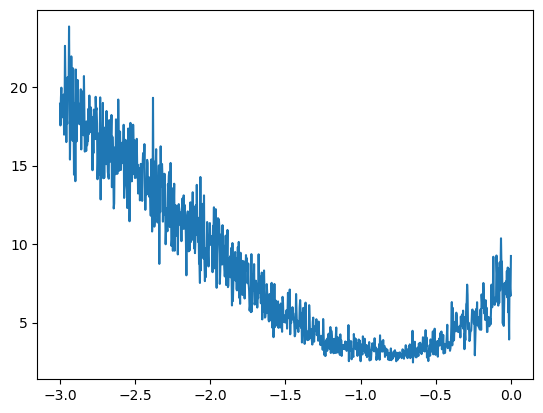

In [41]:
# Plot lri, lossi for visualisation
plt.plot(lri, lossi)
# The output shows that somewhere around -1.0 and -0.5 the loss is least.
# So we will use lr as 0.1

In [42]:
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.4876692295074463


In [43]:
# Learning rate decay - At later stages of training, we lower the learning rate to minimise gradient movement and keep on training the model
# For example - We run the model for first 20000 epochs at lr = 0.1 then set lr = 0.01 for next 10000 epochs
for i in range(1000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01 # Decayed lr
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.758816719055176


In [46]:
"""
When nueral net size is big, that is when there are a lot of params and the training data is less, the model learns to
underfit. 
This means that the model will learn to memorise the data in training data and what output it should produce.
Therefore the loss on training data will be much less but on test data will be much higher, therefore a bad model.

To solve this, we split the training data into 3 parts, namely: 
- Training Split(Around 80%, used to train the model params), 
- Dev/Validation Split (Around 10%, used to train the hyperparameters), 
- Test Split(Around 10%, used to evaluate the performance of model. Used only when model is trained so that model doesn't overfit on test data
as well).
"""
# Building dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [47]:
len(words), n1, n2, n2-n1, len(words)-n2

(32033, 25626, 28829, 3203, 3204)

In [48]:
#Training on Xtr, Ytr and validating/evaluating on Xdev, Ydev below

In [49]:
# Training
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # FORWARD PASS
    emb = C[Xtr[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.388899326324463


In [50]:
# Evaluation
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4115, grad_fn=<NllLossBackward0>)

In [51]:
# Decaying lr and training lesser epochs
for i in range(10000): # Lesser Epochs
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # FORWARD PASS
    emb = C[Xtr[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01 # Decayed lr
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.3147695064544678


In [52]:
# Evaluation
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3433, grad_fn=<NllLossBackward0>)

In [53]:
# Evaluating on testing set
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

# Loss on Training set and Validation set is almost same that means model is not overfitting, and is not memorising data

tensor(2.3386, grad_fn=<NllLossBackward0>)

In [54]:
# Increasing param size
g = torch.Generator().manual_seed(2147483647) # for same result reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]


In [57]:
sum(p.nelement() for p in parameters)

10281

In [58]:
for p in parameters:
    p.requires_grad = True

In [73]:
# First training with lr = 0.1 then ls = 0.05 then lr = 0.01. Training multiple times.
lri = [] # To track lrs used
lossi = [] # To track losses that lr produced
stepi = [] # To track steps
for i in range(30000):
    ix = torch.randint(0, X.shape[0], (32,))
    # FORWARD PASS
    emb = C[X[ix]] # Embeddings (32, 3, 2)
    # First layer will be 3 input embeddings
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # Second (hidden) Layer (32, 100)
    logits = h @ W2 + b2 # Third Layer (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.05 # Changing lr with every iteration # Starting with very low 0.001 then going upto 1
    for p in parameters:
        p.data += -lr * p.grad

    # Track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

2.229926586151123
2.2294270992279053
2.140974760055542
2.3008360862731934
2.3193483352661133
2.3413660526275635
3.022433280944824
2.3268446922302246
2.0827744007110596
2.592989683151245
2.199906587600708
2.31060528755188
2.240265369415283
2.3052871227264404
2.189455270767212
2.1698992252349854
2.564944267272949
2.9325220584869385
2.612506628036499
2.457118272781372
2.351106643676758
2.356990337371826
2.7055678367614746
2.118093729019165
2.4756603240966797
2.5011022090911865
2.5271027088165283
2.028887987136841
2.3891406059265137
2.2582530975341797
2.5380961894989014
2.2014377117156982
2.399721145629883
2.211953639984131
2.615363359451294
2.4089696407318115
2.2458841800689697
2.070228338241577
2.27769136428833
2.735680341720581
2.067286968231201
2.11838436126709
2.3627896308898926
2.3355586528778076
2.074190378189087
2.364361524581909
1.8320873975753784
2.270476818084717
1.874548316001892
2.8660545349121094
2.867785930633545
2.3219776153564453
2.209475517272949
2.037660837173462
1.98397

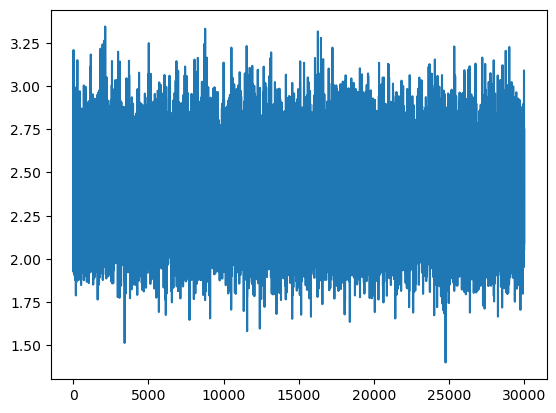

In [67]:
plt.plot(stepi, lossi)

In [74]:
emb = C[Xtr] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2995, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] #(32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss